In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import defs
import appynho
import matplotlib.pyplot as plt
from matplotlib.pylab import *

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_28D = defs.read_well('../data/7-MP-28D-BA.las')
well_31D = defs.read_well('../data/7-MP-31D-BA.las')
well_53D = defs.read_well('../data/7-MP-53D-BA.las')
well_56D = defs.read_well('../data/7-MP-56D-BA.las')

In [4]:
#calculating the DRDN log for all wells
# using the function "drdn" in the file "defs"
drdn_28D = defs.drdn(well_28D['RHOB'], well_28D['NPHI'])
well_28D['DRDN'] = drdn_28D
drdn_31D = defs.drdn(well_31D['RHOB'], well_31D['NPHI'])
well_31D['DRDN'] = drdn_31D
drdn_53D = defs.drdn(well_53D['RHOB'], well_53D['NPHI'])
well_53D['DRDN'] = drdn_53D
drdn_56D = defs.drdn(well_56D['RHOB'], well_56D['NPHI'])
well_56D['DRDN'] = drdn_56D

In [5]:
# calculating the lithology curve for all wells, using the DRDN log
# using the function "create_lithology" in the file "defs"
litho_28D = defs.create_lithology(drdn_28D)
well_28D['LITHOLOGY'] = litho_28D
litho_31D = defs.create_lithology(drdn_31D)
well_31D['LITHOLOGY'] = litho_31D
litho_53D = defs.create_lithology(drdn_53D)
well_53D['LITHOLOGY'] = litho_53D
litho_56D = defs.create_lithology(drdn_56D)
well_56D['LITHOLOGY'] = litho_56D

In [6]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00

In [7]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_28D = defs.formation_zone(well_28D, top, base)
formation_31D = defs.formation_zone(well_31D, top, base)
formation_53D = defs.formation_zone(well_53D, top, base)
formation_56D = defs.formation_zone(well_56D, top, base)

In [9]:
separate_28D = defs.separate_lithology(formation_28D, litho_types)
separate_31D = defs.separate_lithology(formation_31D, litho_types)
separate_53D = defs.separate_lithology(formation_53D, litho_types)
separate_56D = defs.separate_lithology(formation_56D, litho_types)

[25.0, 49.0, 54.0, 57.0]
[25.0, 49.0, 54.0, 57.0]
[25.0, 49.0, 54.0, 57.0]
[25.0, 49.0, 54.0, 57.0]


In [10]:
cores = {
    49.0: '#ffff3f',
    57.0: '#006400',
    54.0: '#af1d4e',
    25.0: '#3fff00'
}

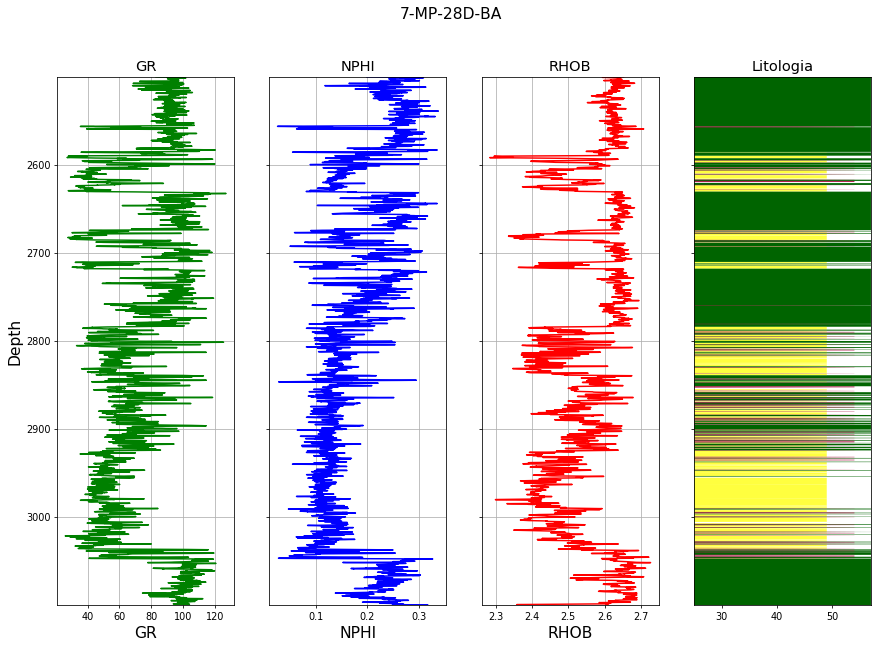

In [11]:
grafico = appynho.plotagem(4, titulo = '7-MP-28D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, formation_28D['GR'], formation_28D['Depth'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, formation_28D['NPHI'], formation_28D['Depth'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, formation_28D['RHOB'], formation_28D['Depth'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, formation_28D['LITHOLOGY'], formation_28D['Depth'], relacao_cor = cores, curva_limite = formation_28D['LITHOLOGY'], titulo = 'Litologia' )

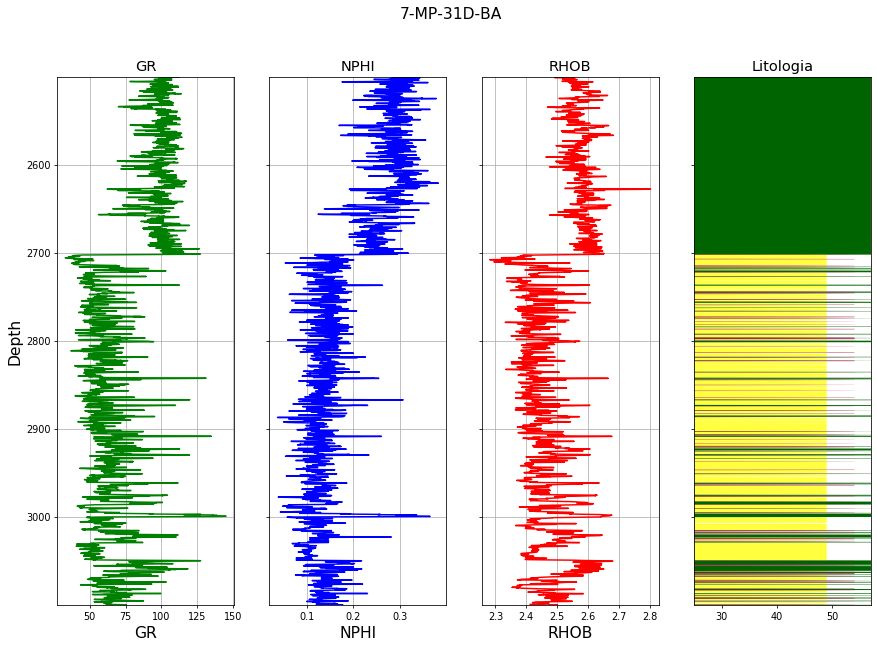

In [12]:
grafico = appynho.plotagem(4, titulo = '7-MP-31D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, formation_31D['GR'], formation_31D['Depth'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, formation_31D['NPHI'], formation_31D['Depth'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, formation_31D['RHOB'], formation_31D['Depth'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, formation_31D['LITHOLOGY'], formation_31D['Depth'], relacao_cor = cores, curva_limite = formation_31D['LITHOLOGY'], titulo = 'Litologia' )

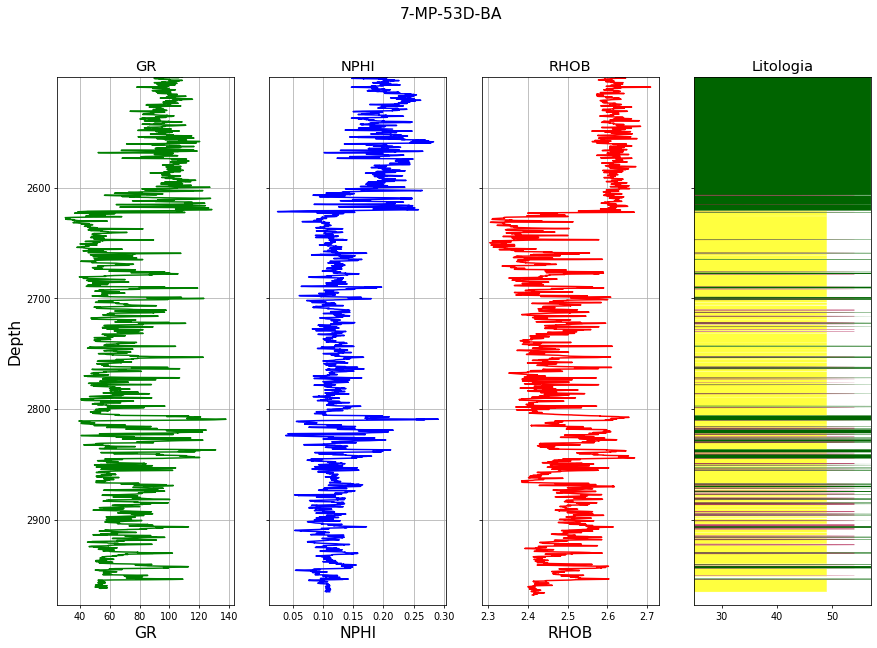

In [13]:
grafico = appynho.plotagem(4, titulo = '7-MP-53D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, formation_53D['GR'], formation_53D['Depth'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, formation_53D['NPHI'], formation_53D['Depth'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, formation_53D['RHOB'], formation_53D['Depth'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, formation_53D['LITHOLOGY'], formation_53D['Depth'], relacao_cor = cores, curva_limite = formation_53D['LITHOLOGY'], titulo = 'Litologia' )

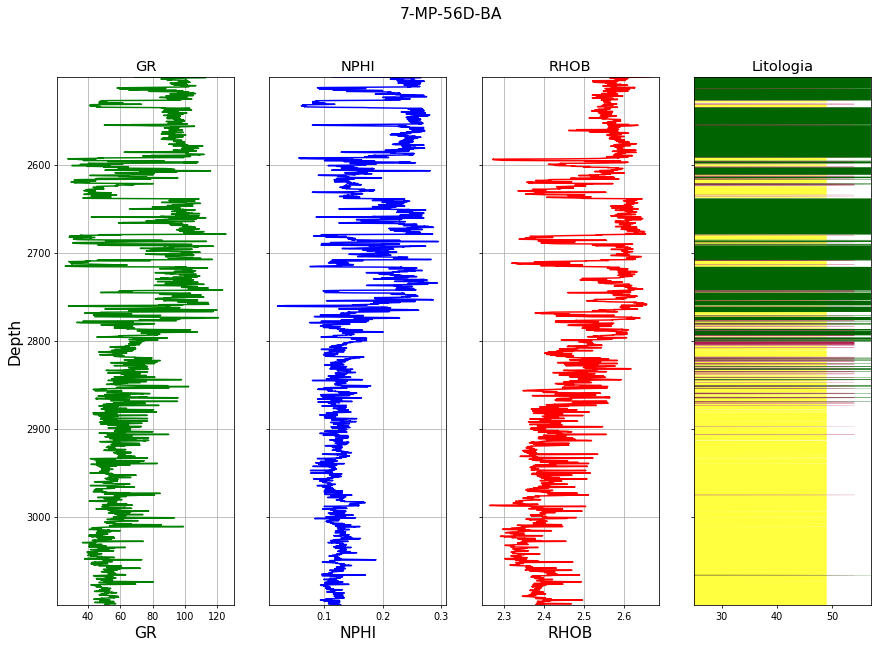

In [14]:
grafico = appynho.plotagem(4, titulo = '7-MP-56D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, formation_56D['GR'], formation_56D['Depth'], cor = 'g', descricao_x = 'GR', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, formation_56D['NPHI'], formation_56D['Depth'], cor = 'b', descricao_x = 'NPHI', descricao_y = 'Depth', titulo = 'NPHI')
grafico.plot_s(2, formation_56D['RHOB'], formation_56D['Depth'], cor = 'r', descricao_x = 'RHOB', descricao_y = 'Depth', titulo = 'RHOB')
grafico.plot_l(3, formation_56D['LITHOLOGY'], formation_56D['Depth'], relacao_cor = cores, curva_limite = formation_56D['LITHOLOGY'], titulo = 'Litologia' )

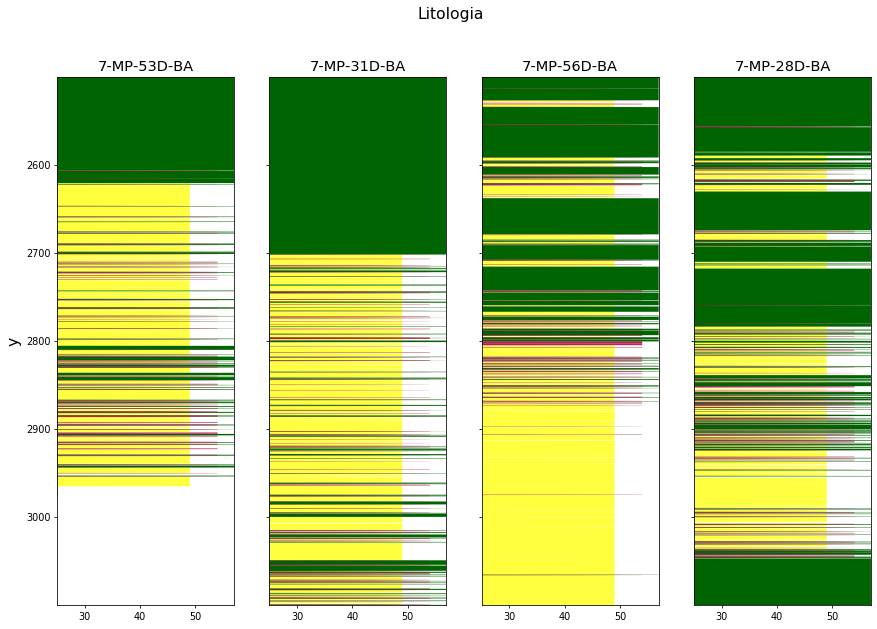

In [16]:
grafico = appynho.plotagem(4, titulo = 'Litologia', altura = 10, comprimento = 15 )
grafico.plot_l(0, formation_53D['LITHOLOGY'], formation_53D['Depth'], relacao_cor = cores, curva_limite = formation_53D['LITHOLOGY'], titulo = '7-MP-53D-BA')
grafico.plot_l(1, formation_31D['LITHOLOGY'], formation_31D['Depth'], relacao_cor = cores, curva_limite = formation_31D['LITHOLOGY'], titulo = '7-MP-31D-BA')
grafico.plot_l(2, formation_56D['LITHOLOGY'], formation_56D['Depth'], relacao_cor = cores, curva_limite = formation_56D['LITHOLOGY'], titulo = '7-MP-56D-BA')
grafico.plot_l(3, formation_28D['LITHOLOGY'], formation_28D['Depth'], relacao_cor = cores, curva_limite = formation_28D['LITHOLOGY'], titulo = '7-MP-28D-BA')